In [6]:
import cv2
import numpy as np

video1 = cv2.VideoCapture('data/train_videos_sample/020/020_001_001.mp4')
video2 = cv2.VideoCapture('data/train_videos_sample/020/020_002_001.mp4')

while True:

    ret1, frame1 = video1.read()
    ret2, frame2 = video2.read()
    if ret1==False or ret2==False:
        break

    frame1=cv2.resize(frame1, (240,320))
    frame2=cv2.resize(frame2, (240,320))

    dst = cv2.addWeighted(frame1,0.3,frame2,0.7,0)
    cv2.imshow('dst',dst)
    key = cv2.waitKey(1)
    if key==ord('q'):
        break

cv2.destroyAllWindows()

In [10]:
import os 
from tqdm import tqdm


In [14]:
video1 = 'data/train_videos_sample/020/020_001_001.mp4'

In [16]:
final_image = []
for video in tqdm(video1, unit='videos', ascii=True):
    name = os.path.abspath(video)
    cap = cv2.VideoCapture(name)     
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    count = 0

    # assumption only first 200 frames are important
    while count < frameCount:
        ret, frame = cap.read()  # extract frame
        final_image.append(frame)
#dst = cv2.addWeighted(frame1,0.3,frame2,0.7,0)

100%|#################################################################################################################################################################################################| 44/44 [00:01<00:00, 22.84videos/s]


In [17]:
final_image

[]

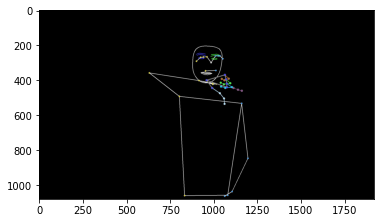

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


image1 = 'data/train_frames_sample/020/020_001_001_frame_0.jpeg'
# reads image 'opencv-logo.png' as grayscale
img = cv2.imread(image1) 
plt.imshow(img)



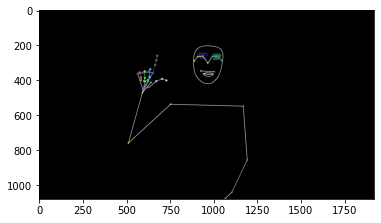

In [28]:
image10 = 'data/train_frames_sample/020/020_001_001_frame_100.jpeg'
# reads image 'opencv-logo.png' as grayscale
img10 = cv2.imread(image10) 
plt.imshow(img10)

In [30]:
vis = np.concatenate((img, img10), axis=0)

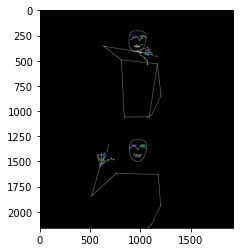

In [31]:
plt.imshow(vis)

In [32]:
h1, w1 = img.shape[:2]
h2, w2 = img10.shape[:2]

#create empty matrix
vis = np.zeros((max(h1, h2), w1+w2,3), np.uint8)

#combine 2 images
vis[:h1, :w1,:3] = img
vis[:h2, w1:w1+w2,:3] = img10

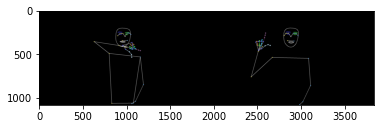

In [33]:
plt.imshow(vis)

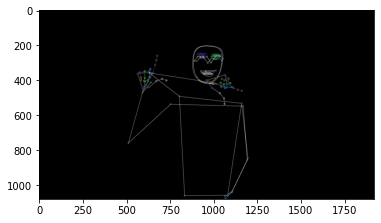

In [39]:
def blend(list_images): # Blend images equally.

    equal_fraction = 1.0 / (len(list_images))

    output = np.zeros_like(list_images[0])

    for img in list_images:
        output = output + img * equal_fraction

    output = output.astype(np.uint8)
    return output

list_images = [img, img10]
output = blend(list_images)

_ = plt.imshow(output)

In [41]:
from os import walk, listdir


In [42]:
data_path = "./data/train_frames_sample"

video_categories = listdir(data_path)
image_files = []
for category in video_categories:
    category_path = data_path+"/"+category
    image_files_category = listdir(category_path)
    image_files = image_files+image_files_category

In [ ]:
frames_video = []


In [38]:
imgs = [img, img10]
for idx, img in enumerate(imgs):
    if idx == 1:
        first_img = img
        continue
    else:
        second_img = img
        second_weight = 1/(idx+1)
        first_weight = 1 - second_weight
        first_img = cv2.addWeighted(first_img, first_weight, second_img, second_weight, 0)

NameError: name 'first_img' is not defined